In [129]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
PATH = "data/creditcardfraud/"
# !ls {PATH}

df_raw = pd.read_csv(f'{PATH}creditcard.csv', low_memory=False)
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
# display_all(df_raw.tail().T)

Testing to see if there are any null values in any of the columns

In [131]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Amount    0.0
Class     0.0
Time      0.0
V1        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V2        0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
dtype: float64

In [132]:
# no null data but yolo
X, y, nas = proc_df(df_raw, 'Class') 
X = np.array(X)
y = np.array(y)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

In [133]:
for train_index, test_index in sss.split(X, y):
#     print(train_index, test_index)
    X_train = X[train_index] 
    X_test  = X[test_index]
    y_train = y[train_index]
    y_test  = y[test_index]

for train_index, test_index in sss.split(X_train, y_train):
#     print(train_index, test_index)
    X_train, X_valid, y_train, y_valid = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    
print(sum(y_train == 1), sum(y_valid == 1), sum(y_test == 1))

315 79 98


In [134]:
m = RandomForestClassifier(n_jobs=-1)
%time m.fit(X_train, y_train)
m.score(X_valid, y_valid)

/home/ana/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 26.2 s, sys: 24 ms, total: 26.2 s
Wall time: 4.73 s


0.9996049946235379

In [135]:
y_pred1 = m.predict(X_valid)

# calculate precision and recall scores

precision = precision_score(y_valid, y_pred1)
recall    = recall_score(y_valid, y_pred1)
f1        = f1_score(y_valid, y_pred1)

print(precision)
print(recall)
print(f1)

0.9420289855072463
0.8227848101265823
0.8783783783783783


bagging

CPU times: user 9.79 s, sys: 12.3 ms, total: 9.8 s
Wall time: 1.44 s


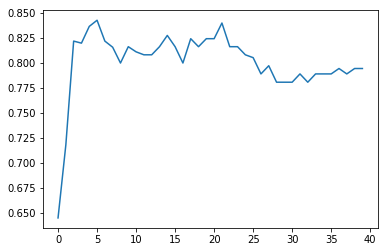

In [152]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=40)
%time m.fit(X_train, y_train)

preds = np.stack([t.predict(X_valid) for t in m.estimators_])

plt.plot([f1_score(y_valid, np.mean(preds[:i+1], axis=0) >= 0.5) for i in range(40)]);

we set n_estimators=6

In [158]:
n_estimators = 6

m = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
%time m.fit(X_train, y_train)

y_pred1 = m.predict(X_valid)

# calculate precision and recall scores

precision = precision_score(y_valid, y_pred1)
recall    = recall_score(y_valid, y_pred1)
f1        = f1_score(y_valid, y_pred1)

print(precision)
print(recall)
print(f1)

CPU times: user 13 s, sys: 3.85 ms, total: 13 s
Wall time: 2.53 s
0.9253731343283582
0.7848101265822784
0.8493150684931507


sampling

/home/ana/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ana/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ana/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ana/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/an

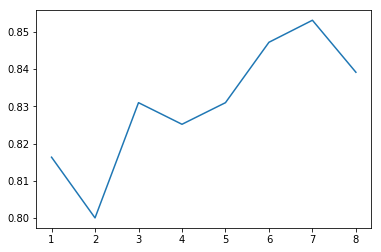

In [176]:
fs = []

for i in range(1, 9):
    set_rf_samples(int(i*0.1*X_train.shape[0]))
    m = RandomForestClassifier(n_jobs=-1)
    m.fit(X_train, y_train)
    y_pred1 = m.predict(X_valid)
    # calculate precision and recall scores
    precision = precision_score(y_valid, y_pred1)
    recall    = recall_score(y_valid, y_pred1)
    f1        = f1_score(y_valid, y_pred1)
    fs.append(f1)
#     print(f1)
plt.plot(range(1, 9), fs)

we take 0.7 of samples

In [177]:
set_rf_samples(int(0.7*X_train.shape[0]))

m = RandomForestClassifier(n_estimators=40, n_jobs=-1)
%time m.fit(X_train, y_train)

y_pred1 = m.predict(X_valid)

# calculate precision and recall scores

precision = precision_score(y_valid, y_pred1)
recall    = recall_score(y_valid, y_pred1)
f1        = f1_score(y_valid, y_pred1)

print(precision)
print(recall)
print(f1)

CPU times: user 1min 15s, sys: 7.99 ms, total: 1min 15s
Wall time: 10.1 s
0.9264705882352942
0.7974683544303798
0.8571428571428572
